In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
data = pd.read_csv('car_price.csv')


In [128]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [129]:
 data = data[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'
            ]]  

In [130]:

 data['Current_Year'] = 2020
 

In [131]:
data['# Years'] = data['Current_Year'] - data['year'] 

In [132]:
 drop = ['Current_Year','year','torque','max_power','seller_type','owner']
data.drop(drop, inplace = True, axis = 1)

In [133]:
data['engine']= data['engine'].str.replace('[^\d.]', '',regex = True).astype(float) 


In [134]:
data['mileage'] = data['mileage'].str.replace('[^\d.]', '',regex = True).astype(float) 

In [135]:
data.replace(to_replace = ['Diesel','Petrol','LPG','CNG'],value=[1,2,3,4],inplace = True) 

In [136]:
data.replace(to_replace = ['Manual','Automatic'],value=[1.0,2.0],inplace = True) 

In [137]:
data

,selling_price,km_driven,fuel,transmission,mileage,engine,seats,# Years
0,450000,145500,1,1.0,23.40,1248.0,5.0,6
1,370000,120000,1,1.0,21.14,1498.0,5.0,6
2,158000,140000,2,1.0,17.70,1497.0,5.0,14
3,225000,127000,1,1.0,23.00,1396.0,5.0,10
4,130000,120000,2,1.0,16.10,1298.0,5.0,13
...,...,...,...,...,...,...,...,...
8123,320000,110000,2,1.0,18.50,1197.0,5.0,7
8124,135000,119000,1,1.0,16.80,1493.0,5.0,13
8125,382000,120000,1,1.0,19.30,1248.0,5.0,11
8126,290000,25000,1,1.0,23.57,1396.0,5.0,7


<AxesSubplot:>

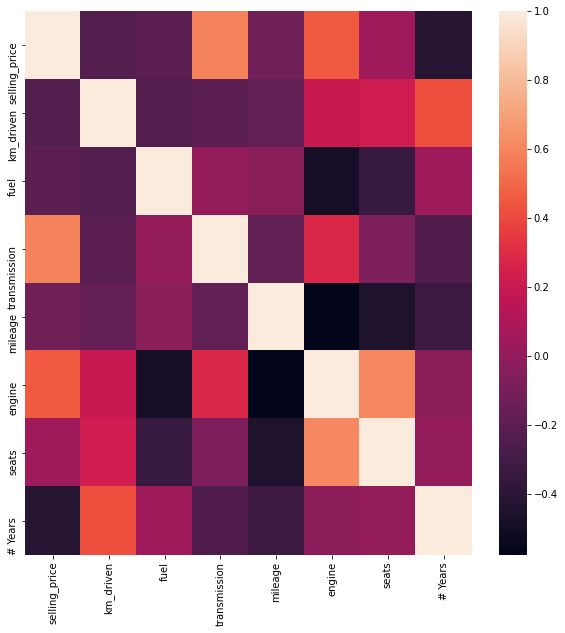

In [138]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr()) 

array([[<AxesSubplot:title={'center':'selling_price'}>,
        <AxesSubplot:title={'center':'km_driven'}>,
        <AxesSubplot:title={'center':'fuel'}>],
       [<AxesSubplot:title={'center':'transmission'}>,
        <AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'engine'}>],
       [<AxesSubplot:title={'center':'seats'}>,
        <AxesSubplot:title={'center':'# Years'}>, <AxesSubplot:>]],
      dtype=object)

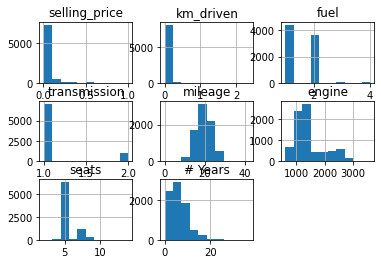

In [139]:
data.hist()

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

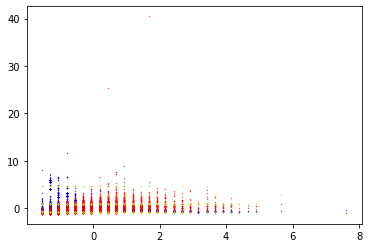

In [141]:
plt.scatter(data[:,-1],data[:,0],s=0.1,c='b')
plt.scatter(data[:,-1],data[:,1],s=0.1,c='r')
plt.scatter(data[:,-1],data[:,2],s=0.1,c='y')
# plt.scatter(data[:,-1],data[:,3],s=0.1,c='g')


# #unscaled data
# plt.scatter(data["PE"],data["AT"],s=0.1,c='b')
# plt.scatter(data["PE"],data["AP"],s=0.1,c='r')


In [142]:
 chart=data.select_dtypes(include=['float64','int64'])
 

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [143]:
plt.figure(figsize=(20, 10))
sn.pairplot(chart)

NameError: name 'sn' is not defined

<Figure size 1440x720 with 0 Axes>

In [144]:
pred = lambda x,theta: x.dot(theta)

def standardize(x,x_v):
    n = x-x_v.mean()
    return(n/x_v.std())

def ols(x,y):

    y_ = y.mean()
    x_ = x.mean()

    b1 = np.sum((y-y_)*(x-x_))/np.sum((x-x_)**2)
    b0 = y_- b1*x_
    return(b0,b1)

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J


def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)

    r2 = 1-(ssr/sst)
    return(r2)


In [145]:

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
       
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [146]:

X_train = data[:,:1]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]

y_train = data[:,-1]


X_test = data[:,:1]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

y_test = data[2:,-1]

# Initial Coefficients
B = np.zeros(X_train.shape[1])

alpha = 0.005
iter_ = 20000

newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

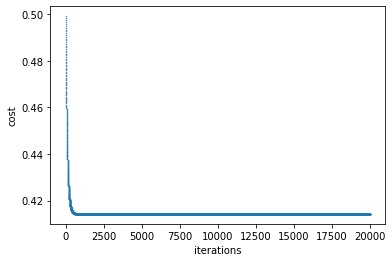

In [147]:
 
plt.xlabel('iterations')
plt.ylabel('cost')

plt.scatter(np.arange(iter_),cost_history,s=0.2)

In [148]:
data



array([[-0.2335288 ,  1.33836255, -0.86978216, ..., -0.41800262,
        -0.43429672, -0.04846419],
       [-0.33275929,  0.88741086, -0.86978216, ...,  0.07814289,
        -0.43429672, -0.04846419],
       [-0.5957201 ,  1.24109846,  0.95321665, ...,  0.0761583 ,
        -0.43429672,  1.9297752 ],
       ...,
       [-0.31787472,  0.88741086, -0.86978216, ..., -0.41800262,
        -0.43429672,  1.18793543],
       [-0.43198978, -0.79260528, -0.86978216, ..., -0.12428448,
        -0.43429672,  0.19881574],
       [-0.43198978, -0.79260528, -0.86978216, ..., -0.12428448,
        -0.43429672,  0.19881574]])

In [149]:
 cost_history


[0.4991447830559638,
 0.4982980969009444,
 0.4974598564403213,
 0.4966299774282929,
 0.49580837645940956,
 0.4949949709601908,
 0.4941896791808267,
 0.4933924201869618,
 0.4926031138515607,
 0.4918216808468552,
 0.49104804263637164,
 0.49028212146703765,
 0.48952384036136776,
 0.4887731231097269,
 0.48802989426267124,
 0.4872940791233649,
 0.48656560374007324,
 0.4858443948987298,
 0.48513038011557885,
 0.4844234876298898,
 0.4837236463967455,
 0.48303078607990174,
 0.4823448370447186,
 0.4816657303511613,
 0.48099339774687233,
 0.48032777166031115,
 0.4796687851939634,
 0.4790163721176174,
 0.4783704668617079,
 0.4777310045107263,
 0.4770979207966956,
 0.4764711520927124,
 0.4758506354065514,
 0.4752363083743349,
 0.47462810925426474,
 0.47402597692041726,
 0.47342985085659994,
 0.4728396711502692,
 0.4722553784865091,
 0.47167691414206997,
 0.47110421997946667,
 0.4705372384411353,
 0.4699759125436488,
 0.46942018587198975,
 0.46887000257388045,
 0.4683253073541699,
 0.46778604546927

In [150]:
for i in cost_history:
    print (i)

0.4991447830559638
0.4982980969009444
0.4974598564403213
0.4966299774282929
0.49580837645940956
0.4949949709601908
0.4941896791808267
0.4933924201869618
0.4926031138515607
0.4918216808468552
0.49104804263637164
0.49028212146703765
0.48952384036136776
0.4887731231097269
0.48802989426267124
0.4872940791233649
0.48656560374007324
0.4858443948987298
0.48513038011557885
0.4844234876298898
0.4837236463967455
0.48303078607990174
0.4823448370447186
0.4816657303511613
0.48099339774687233
0.48032777166031115
0.4796687851939634
0.4790163721176174
0.4783704668617079
0.4777310045107263
0.4770979207966956
0.4764711520927124
0.4758506354065514
0.4752363083743349
0.47462810925426474
0.47402597692041726
0.47342985085659994
0.4728396711502692
0.4722553784865091
0.47167691414206997
0.47110421997946667
0.4705372384411353
0.4699759125436488
0.46942018587198975
0.46887000257388045
0.4683253073541699
0.4677860454692758
0.4672521627216837
0.4667236054544987
0.46620032054605387
0.46568225540457087
0.4651693579